In [17]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [18]:
trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"D:/tamil_noninverted/Train",
			target_size = (64,64),
			batch_size = 64,
			color_mode = "grayscale",
			class_mode = "categorical")

Found 61776 images belonging to 156 classes.


In [20]:
prev = ""
labels = []
for x in range(0,156):
    labels.append(str(x))
count = 0;

In [21]:
validation_generator = test_datagen.flow_from_directory(
			"D:/tamil_noninverted/Test",
			target_size=(64,64),
			batch_size=64,
			color_mode = "grayscale",
			class_mode= 'categorical')
			
model = Sequential()

Found 10920 images belonging to 156 classes.


In [22]:
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (64,64,1)))

model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (64,64,1)))
model.add(BatchNormalization())
#model.add(MaxPooling2D())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
#model.add(Dropout(0.25))


#Layers 3-----------------------------------------------------------	
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			
			
#model.add(Dropout(0.2))


#Layer 5------------------------------------------------------------
'''model.add(Convolution2D(filters = 64,
			kernel_size = (2,2),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))'''


model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(156,
		activation = "softmax",
		kernel_initializer = "uniform"))			
			
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)       

In [24]:
res=model.fit_generator(
		trainGenerator,
		epochs = 50,
		steps_per_epoch = 965,
		validation_data = validation_generator,
		validation_steps = 130
		)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 965 steps, validate for 130 steps
Epoch 1/50
965/965 [==============================] - 342s 355ms/step - loss: 0.8138 - accuracy: 0.7646 - val_loss: 0.8009 - val_accuracy: 0.7585
Epoch 2/50
965/965 [==============================] - 370s 383ms/step - loss: 0.6724 - accuracy: 0.8025 - val_loss: 0.5850 - val_accuracy: 0.8237
Epoch 3/50
965/965 [==============================] - 377s 390ms/step - loss: 0.5922 - accuracy: 0.8265 - val_loss: 0.6639 - val_accuracy: 0.8044
Epoch 4/50
965/965 [==============================] - 372s 386ms/step - loss: 0.5435 - accuracy: 0.8403 - val_loss: 0.4217 - val_accuracy: 0.8734
Epoch 5/50
965/965 [==============================] - 387s 401ms/step - loss: 0.5146 - accuracy: 0.8478 - val_loss: 0.4973 - val_accuracy: 0.8454
Epoch 6/50
965/965 [==============================] - 390s 405ms/step - loss: 0.4953 - accuracy: 0.8549 - val_loss: 0.7556 - val_accuracy: 0.7922
Epoch 7/50
965/965 [==========

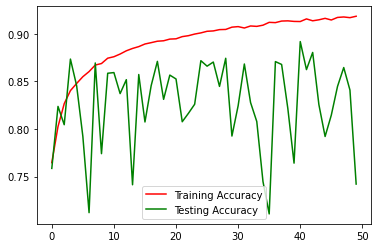

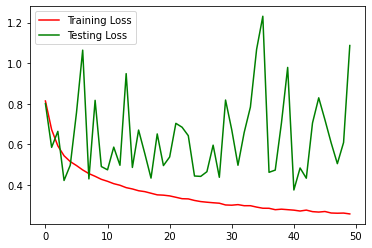

In [25]:
%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()